# Assignment 1/A
**Disclaimer: Only for ADL/AML students!**

### General information
**You have to solve all tasks to pass!** 

Grade is calculated by the day of the last submission, but you will only get it after you've succesfully presented it. 

**Deadlines and grades:** 
  * 2020.09.20 - 2020.10.27 ==> 5
  * 2020.10.28 - 2020.11.03 ==> 4
  * 2020.10.04 - 2020.11.10 ==> 3
  * 2020.11.11 - 2020.11.17 ==> 2
  * 2020.11.18 or later ==> 1 

You can **use only these** 3rd party **packages:** `cv2, keras, matplotlib, numpy, sklearn, skimage, tensorflow`. (And `torchvision` for dowloading the dataset.)

### Description
In this assignment you have to build and train an airplane segmentation model using tf.keras. For architecture we will use a kind of autoencoder, called UNet. This kind of network has connections between the corresponding encoder and decoder layers. To implement such kind of models, you should take a look at the following classes and methods: `Funcitonal API, MaxPooling2D, concatenate, Conv2DTranspose`.

You can find some help in the following blog: 

https://towardsdatascience.com/cityscape-segmentation-with-tensorflow-2-0-b320b6605cbf

and its corresponding notebook: 

https://colab.research.google.com/drive/1i-7Vn_9hGdOvMjkYNedK5nsonNizhe0o?source=post_page-----b320b6605cbf----------------------

### Use GPU
Runtime -> Change runtime type

At Hardware accelerator select  GPU then save it.  

### Useful shortcuts
* Run selected cell: *Ctrl + Enter*
* Insert cell below: *Ctrl + M B*
* Insert cell above: *Ctrl + M A*
* Convert to text: *Ctrl + M M*
* Split at cursor: *Ctrl + M -*
* Autocomplete: *Ctrl + Space* or *Tab*
* Move selected cells up: *Ctrl + M J*
* Move selected cells down: *Ctrl + M K*
* Delete selected cells: *Ctrl + M D*


## Prepare dataset

* Download the PascalVOC2012 segmentation dataset. Here you can find more information about the labels: http://host.robots.ox.ac.uk/pascal/VOC/voc2012/htmldoc/index.html or https://pjreddie.com/media/files/VOC2012_doc.pdf *Hint: you don't need to load the data from scrach, you can iterate over the `data` variable, it will automatically read the image and the mask.*
* To see some samples, plot 5 random images and their corresponding labels.
* Crop each image to be an NxN image.
* Select only those, that contains aeroplanes and create a binary masks. *Note: you should get a binary image, where only aeroplane points are 255, others are 0.*
* Resize the images and the masks to 128x128. *Note: Do not use interpolation while resizing the mask.* 
* Split the datasets into train-val-test sets (ratio: 60-20-20), without shuffling.
* Print the size of each set and plot 5 training images and their corresponding masks.
* Normalize the datasets. Input values should be between -1.0 and 1.0, and targets should range between 0.0 and 1.0. *Note: you don't have to use standardization, you can just divide them by 255.*


In [ ]:
pip install torch===1.4.0 torchvision===0.5.0 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
!mkdir -p ./voc2012

# Download from Drive
!if ! [ -f ./voc2012/VOCtrainval_11-May-2012.tar ]; then curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=19Mh6P8sXJzD_j0O2AN_StB2fbqBXJNWA" > /dev/null; curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=19Mh6P8sXJzD_j0O2AN_StB2fbqBXJNWA" -o ./voc2012/VOCtrainval_11-May-2012.tar; fi

# Check if the file size is correct (~1.86GB)
!if (( $(stat -c%s ./voc2012/VOCtrainval_11-May-2012.tar) < 1999639040 )); then rm -rfd ./voc2012/VOCtrainval_11-May-2012.tar; fi

# If not, download it from NIPG12
!wget -nc -O ./voc2012/VOCtrainval_11-May-2012.tar http://nipg1.inf.elte.hu:8000/VOCtrainval_11-May-2012.tar

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
import sklearn
import torchvision

data = torchvision.datasets.VOCSegmentation('./voc2012/', year='2012', image_set='trainval', download=True)

## Data augmentation
  * Augment the training set using `ImageDataGenerator`. The parameters should be the following: `featurewise_center=False, featurewise_std_normalization=False, rotation_range=90., width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True`.
  * When creating the generator(s), use shuffling with a seed value of 1 and batch size of 32.
  * To validate that the augmentation is working, plot 5 original images with their corresponding transformed (augmented) images and masks.

**Keep in mind:** To augment the inputs and targets the same way, you should create 2 separate generator, then you can zip them together. 


## Define the model
Define a UNet model in tf.keras. The architecture should look similar to the one in [blog/notebook](https://colab.research.google.com/drive/1i-7Vn_9hGdOvMjkYNedK5nsonNizhe0o?source=post_page-----b320b6605cbf----------------------), but smaller by 2 stages.

You can see the exact architecture on the figure below. 
* Use `padding='same'` for each layer and use `Conv2DTranspose` layers to upscale the results. 
* For optimizer use Adam, and add accuracy to the metrics.

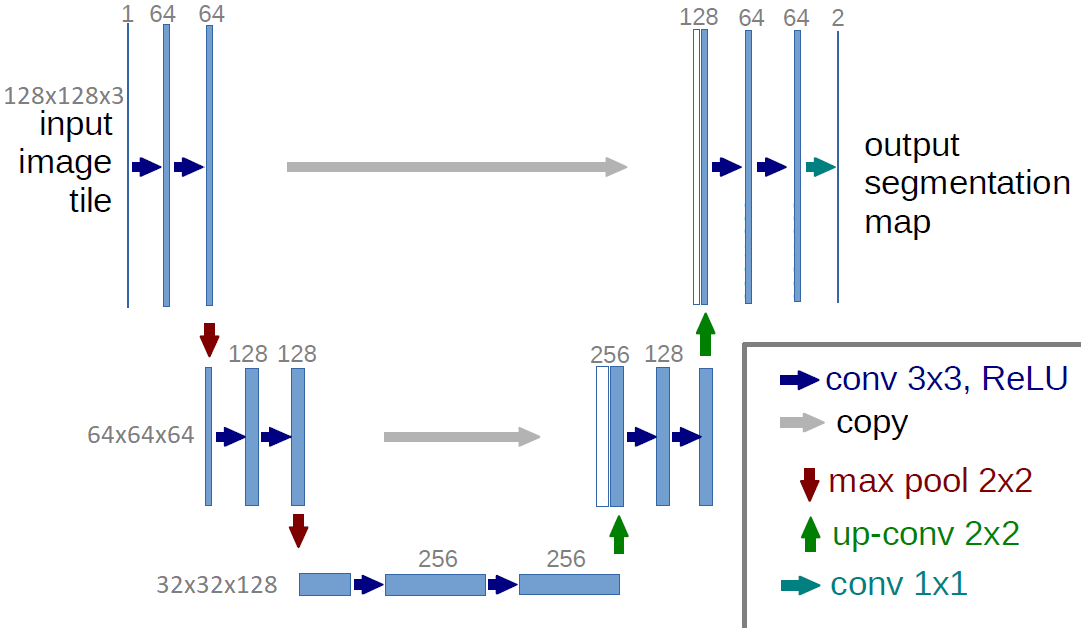

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

In [ ]:
def unet(input_size=(128, 128, 3)):
  pass

model = unet(input_size=(128, 128, 3))
model.summary()

## Training and evaluation 
  * Train the model for 50 epochs and use early stopping with patience of 10.
  * Plot the training curve (train/validation loss and train/validation accuracy).
  * Evaluate the trained model on the test set and plot some (5) predictions with their corresponding GT masks.